In [2]:
# Libararies

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.misc import derivative
from scipy import integrate


In [8]:
def U(r):
    return r**6

def F2(f,T,dimension,dx):
    
    assert dimension == 1 or dimension == 2 or dimension == 3, "dimension must be (1/2/3)"

    beta = 1/T    
    
    if (dimension == 1):
        norm = integrate.quad(lambda x: 2*np.exp(-beta*f(x)),0,100)
        res = integrate.quad(lambda x: 2*np.exp(-beta*f(x))*(derivative(f,x,dx)**2),0,100)
        return res[0]/norm[0]
    if (dimension == 2):
        norm = integrate.quad(lambda x: 2*np.pi*x*np.exp(-beta*f(x)),0,100)
        res = integrate.quad(lambda x: 2*np.pi*x*np.exp(-beta*f(x))*(derivative(f,x,dx)**2),0,100)
        return res[0]/norm[0]
    if (dimension == 3):
        norm = integrate.quad(lambda x: 4*np.pi*x**2*np.exp(-beta*f(x)),0,100)
        res = integrate.quad(lambda x: 4*np.pi*x**2*np.exp(-beta*f(x))*(derivative(f,x,dx)**2),0,100)
        return res[0]/norm[0]

a = F2(U,1,3,0.0001)
b = F2(U,2,3,0.0001)
c = F2(U,3,3,0.0001)
print(a)
print(b)
print(c)
print('power of T ~ ' + str(round(np.log2(b/a),3)))


21.983203822271353
69.79232091198766
137.180717511457
power of T ~ 1.667


In [36]:
K = 1
def w(q):
    return K * abs(np.sin(q/2))

def Thermal_Conductivity(U, T, dimension, dx):
    L = F2(U, T, dimension, dx) # Fluctuation-Dissipation
    
    def C(t):
        return F2(U, t, dimension, dx)
    
    def g(freq,q):
        Om = w(q)
        res = freq**2/((Om**2-freq**2)**2+ (L*freq)**2)**2 * 4 * Om * derivative(w,q,dx) * np.sin(q) * (C(freq)- np.heaviside(freq - T, 0)*derivative(C,T,dx))
        return res

    return 4 * integrate.dblquad(lambda q, freq: g(freq,q), 0 , 50, lambda q:0, lambda q:np.pi)[0]

print(Thermal_Conductivity(U,0.4,1,0.0001))


-4.73326246169557


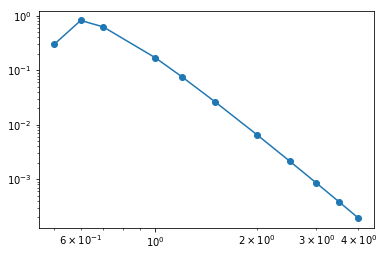

In [35]:
'''

Thermal conductivity for U = r^4 : 

T = 0.5,   0.2971
T = 0.6,   0.8212
T = 0.7,   0.6249
T = 1.0,   0.1688
T = 1.2,   0.0753
T = 1.5,   0.0265
T = 2.0,   0.006546
T = 2.5,   0.002149
T = 3.0,   0.0008528
T = 3.5,   0.0003863
T = 4.0,   0.0001927

'''

x = [0.5,0.6,0.7, 1.0,1.2,1.5,2.0,2.5,3.0,3.5,4.0]
y = [0.2971,0.82118,0.6249, 0.1688,0.0753,0.0265,0.006546,0.002149,0.0008528,0.0003863,0.0001927]


plt.yscale('log')
plt.xscale('log')
plt.plot(x,y,'o-')

In [51]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        
        res = []
        
        def aux(ca,ta,start=0,ans=[]):

            if (ta in ca) and (ans +[ta] not in res):
                res.append(ans + [ta])
            for i in range(start,len(ca)-1):
                clone = ans[:]
                ans.append(ca[i])
                if (ca[i+1] <= ta - ca[i]):
                        aux(ca,ta-ca[i],i+1,ans)

                ans = clone
        
        candidates.sort()
        aux(candidates,target)
        
        return res

L = [10,1,2,7,6,1,5]
#L = [1,2,5]
t = 8

print(combinationSum2(L,t))

[[1, 7], [1, 1, 6], [1, 2, 5], [2, 6]]


In [94]:
def fibonacci(): 
    a=b=1
    yield a
    yield b
    while True:
        a,b = b,a+b 
        yield b 
    
def count(n):
    while n > 0:
        yield n   # 生成值: n
        n -= 1

In [89]:

print(set(count(3)))

{1, 2, 3}


In [97]:
x = fibonacci()
for i in x:
    if i < 100:
        print (i)
    else:
        break
a = float('inf')
print(a)

1
1
2
3
5
8
13
21
34
55
89
inf
